In [1]:
from glob import glob
import pandas as pd
import os
from datetime import datetime

# aoi = "AOI02"
aoi = "AOI01"
flood_date = "2022-03-29"

folder_aoi = f"../../1_Staging/WorldFloods/{aoi}"
dats = []
for f in glob(f"{folder_aoi}/*/*info.csv"):
    satellite = os.path.basename(os.path.dirname(f))
    d = pd.read_csv(f)
    d["satellite"] = satellite
    dats.append(d)

dats = pd.concat(dats,ignore_index=True)
dats["datetime"] = dats["datetime"].apply(lambda x: datetime.fromisoformat(x))
dats = dats.sort_values(by="datetime",ignore_index=True)
dats = dats[~dats.cloud_probability.isna()]
dats

system:time_start    valids  cloud_probability  \
0        1.640130e+12  1.000000           0.000003   
1        1.640131e+12  1.000000           0.027178   
2        1.640563e+12  1.000000           0.903545   
3        1.640821e+12  1.000000           0.521879   
4        1.640995e+12  1.000000           0.999870   
5        1.641427e+12  1.000000           0.524936   
6        1.641513e+12  1.000000           0.833651   
7        1.641859e+12  1.000000           0.385634   
8        1.642204e+12  1.000000           0.167090   
9        1.642291e+12  1.000000           0.485258   
10       1.642723e+12  1.000000           0.958675   
11       1.642895e+12  1.000000           0.884477   
12       1.643155e+12  1.000000           0.956515   
13       1.643586e+12  1.000000           0.356309   
14       1.643587e+12  1.000000           0.376512   
15       1.644019e+12  1.000000           0.838542   
16       1.644277e+12  1.000000           0.582071   
17       1.644451e+12  1.000000           0.046105   
18       1.644883e+12  1.000000           0.959888   
19       1.644969e+12  1.000000           0.672043   
20       1.645315e+12  0.935972           0.991146   
21       1.645747e+12  1.000000           0.995793   
22       1.646179e+12  1.000000           0.563807   
23       1.646351e+12  1.000000           0.980618   
24       1.646611e+12  1.000000           0.884155   
25       1.647042e+12  1.000000           0.492942   
26       1.647043e+12  0.604391           0.607850   
27       1.647475e+12  1.000000           0.700512   
28       1.647733e+12  1.000000           0.069370   
29       1.647907e+12  0.935972           0.068372   
30       1.648339e+12  1.000000           0.993219   
31       1.648771e+12  1.000000           0.026069   
32       1.649116e+12  1.000000           0.000783   
33       1.649203e+12  1.000000           0.836706   
34       1.649635e+12  1.000000           0.049232   
35       1.649807e+12  1.000000           0.983638   
36       1.650067e+12  1.000000           0.585271   

                           datetime  index_image_collection satellite  
0  2021-12-21 23:42:48.499000+00:00                       7   Landsat  
1  2021-12-21 23:54:40.570500+00:00                       0        S2  
2  2021-12-26 23:54:47.276000+00:00                       1        S2  
3  2021-12-29 23:42:46.468000+00:00                       0   Landsat  
4  2021-12-31 23:54:41.701000+00:00                       2        S2  
5  2022-01-05 23:54:47.326000+00:00                       3        S2  
6  2022-01-06 23:42:47.160000+00:00                       8   Landsat  
7  2022-01-10 23:54:41.745000+00:00                       4        S2  
8  2022-01-14 23:42:44.667000+00:00                       1   Landsat  
9  2022-01-15 23:54:46.420500+00:00                       5        S2  
10 2022-01-20 23:54:40.816000+00:00                       6        S2  
11 2022-01-22 23:42:47.439000+00:00                       9   Landsat  
12 2022-01-25 23:54:45.843000+00:00                       7        S2  
13 2022-01-30 23:42:39.605000+00:00                       2   Landsat  
14 2022-01-30 23:54:39.847000+00:00                       8        S2  
15 2022-02-04 23:54:45.472000+00:00                       9        S2  
16 2022-02-07 23:42:46.411000+00:00                      10   Landsat  
17 2022-02-09 23:54:39.983000+00:00                      10        S2  
18 2022-02-14 23:54:46.064500+00:00                      11        S2  
19 2022-02-15 23:42:35.362000+00:00                       3   Landsat  
20 2022-02-19 23:54:47.240000+00:00                      12        S2  
21 2022-02-24 23:54:48.418500+00:00                      13        S2  
22 2022-03-01 23:54:42.411000+00:00                      14        S2  
23 2022-03-03 23:42:31.984000+00:00                       4   Landsat  
24 2022-03-06 23:54:49.696500+00:00                      15        S2  
25 2022-03-11 23:42:33.049000+00:00                      11   Landsat  
26 2022

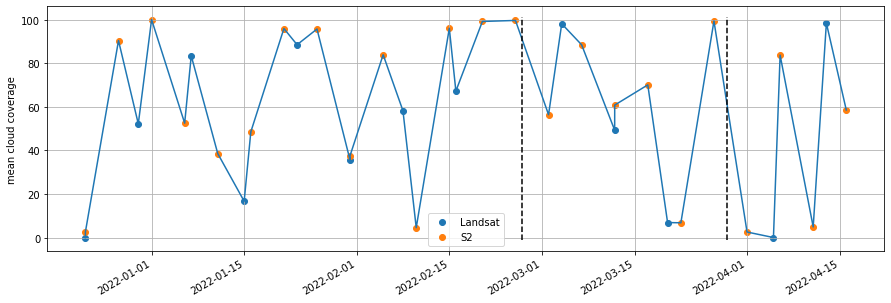

In [2]:
import matplotlib.pyplot as plt
dats_copy = dats.copy()
dats_copy.cloud_probability*=100

fig, ax = plt.subplots(1,1,figsize=(15,5))

flood_date_1 = "2022-02-26"
for c in ["Landsat","S2"]:
    ax.scatter(x=dats_copy[dats_copy.satellite == c].datetime,y=dats_copy[dats_copy.satellite == c].cloud_probability, label=c)

ax.legend()
dats_copy.plot(x="datetime",y="cloud_probability",ax=ax,legend=None)
plt.vlines(x=datetime.strptime(flood_date,"%Y-%m-%d"),ymin=-1,ymax=101,colors="black",linestyles="dashed")
plt.vlines(x=datetime.strptime(flood_date_1,"%Y-%m-%d"),ymin=-1,ymax=101,colors="black",linestyles="dashed")
plt.ylabel("mean cloud coverage")
plt.xlabel("")
plt.grid()

## Post-process images

In [3]:
floodmaps = sorted(glob(os.path.join(folder_aoi,"WF2_unet_rbgiswirs","*.tif")))
images_landsat = sorted(glob(os.path.join(folder_aoi,"Landsat","*.tif")))
images_s2 = sorted(glob(os.path.join(folder_aoi,"S2","*.tif")))
permanent_water = sorted(glob(os.path.join(folder_aoi,"PERMANENTWATERJRC","*.tif")))[0]
images_s2

['../../1_Staging/WorldFloods/AOI01/S2/2021-12-21.tif',
 '../../1_Staging/WorldFloods/AOI01/S2/2022-01-05.tif',
 '../../1_Staging/WorldFloods/AOI01/S2/2022-01-10.tif',
 '../../1_Staging/WorldFloods/AOI01/S2/2022-01-15.tif',
 '../../1_Staging/WorldFloods/AOI01/S2/2022-01-30.tif',
 '../../1_Staging/WorldFloods/AOI01/S2/2022-02-04.tif',
 '../../1_Staging/WorldFloods/AOI01/S2/2022-02-09.tif',
 '../../1_Staging/WorldFloods/AOI01/S2/2022-03-01.tif',
 '../../1_Staging/WorldFloods/AOI01/S2/2022-03-11.tif',
 '../../1_Staging/WorldFloods/AOI01/S2/2022-03-16.tif',
 '../../1_Staging/WorldFloods/AOI01/S2/2022-03-21.tif',
 '../../1_Staging/WorldFloods/AOI01/S2/2022-03-31.tif',
 '../../1_Staging/WorldFloods/AOI01/S2/2022-04-05.tif',
 '../../1_Staging/WorldFloods/AOI01/S2/2022-04-10.tif',
 '../../1_Staging/WorldFloods/AOI01/S2/2022-04-15.tif']

In [4]:
images_s2[0][-14:-4]

'2021-12-21'

In [5]:
permanent_water

'../../1_Staging/WorldFloods/AOI01/PERMANENTWATERJRC/2022.tif'

In [6]:
images_landsat

['../../1_Staging/WorldFloods/AOI01/Landsat/2021-12-21.tif',
 '../../1_Staging/WorldFloods/AOI01/Landsat/2021-12-29.tif',
 '../../1_Staging/WorldFloods/AOI01/Landsat/2022-01-14.tif',
 '../../1_Staging/WorldFloods/AOI01/Landsat/2022-01-30.tif',
 '../../1_Staging/WorldFloods/AOI01/Landsat/2022-02-07.tif',
 '../../1_Staging/WorldFloods/AOI01/Landsat/2022-02-15.tif',
 '../../1_Staging/WorldFloods/AOI01/Landsat/2022-03-11.tif',
 '../../1_Staging/WorldFloods/AOI01/Landsat/2022-03-19.tif',
 '../../1_Staging/WorldFloods/AOI01/Landsat/2022-04-04.tif']

In [7]:
floodmaps

['../../1_Staging/WorldFloods/AOI01/WF2_unet_rbgiswirs/2021-12-21.tif',
 '../../1_Staging/WorldFloods/AOI01/WF2_unet_rbgiswirs/2021-12-29.tif',
 '../../1_Staging/WorldFloods/AOI01/WF2_unet_rbgiswirs/2022-01-05.tif',
 '../../1_Staging/WorldFloods/AOI01/WF2_unet_rbgiswirs/2022-01-10.tif',
 '../../1_Staging/WorldFloods/AOI01/WF2_unet_rbgiswirs/2022-01-14.tif',
 '../../1_Staging/WorldFloods/AOI01/WF2_unet_rbgiswirs/2022-01-15.tif',
 '../../1_Staging/WorldFloods/AOI01/WF2_unet_rbgiswirs/2022-01-30.tif',
 '../../1_Staging/WorldFloods/AOI01/WF2_unet_rbgiswirs/2022-02-04.tif',
 '../../1_Staging/WorldFloods/AOI01/WF2_unet_rbgiswirs/2022-02-07.tif',
 '../../1_Staging/WorldFloods/AOI01/WF2_unet_rbgiswirs/2022-02-09.tif',
 '../../1_Staging/WorldFloods/AOI01/WF2_unet_rbgiswirs/2022-02-15.tif',
 '../../1_Staging/WorldFloods/AOI01/WF2_unet_rbgiswirs/2022-03-01.tif',
 '../../1_Staging/WorldFloods/AOI01/WF2_unet_rbgiswirs/2022-03-11.tif',
 '../../1_Staging/WorldFloods/AOI01/WF2_unet_rbgiswirs/2022-03-1

/tmp/ipykernel_6165/4061519099.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,2, figsize=(10,7), tight_layout=True)


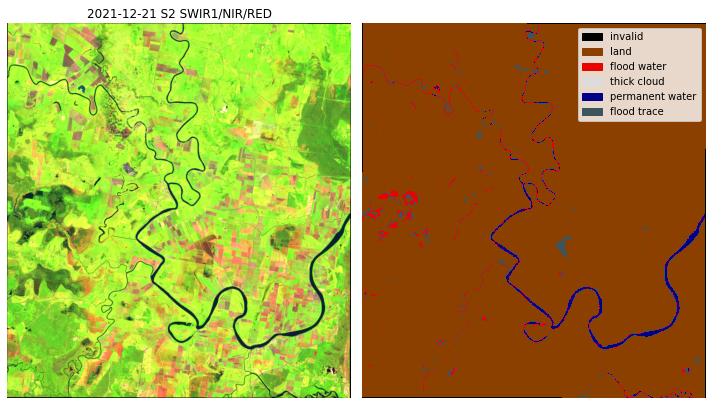

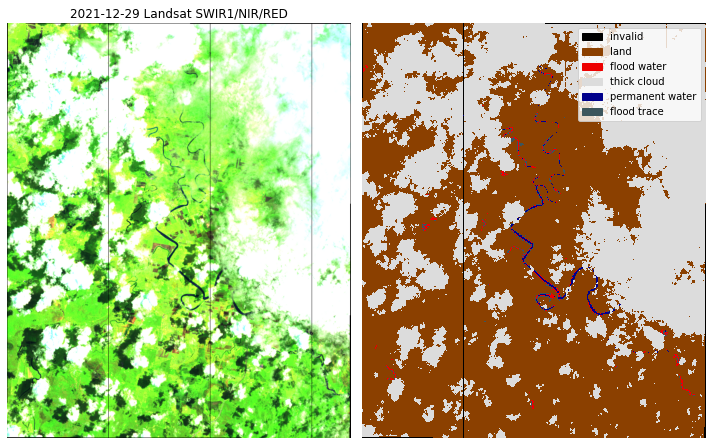

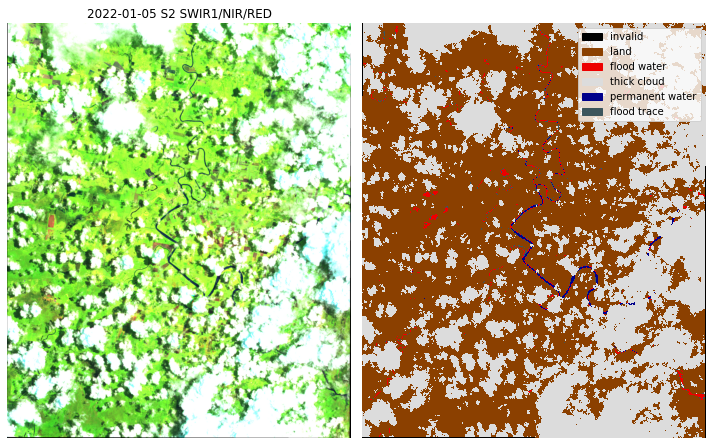

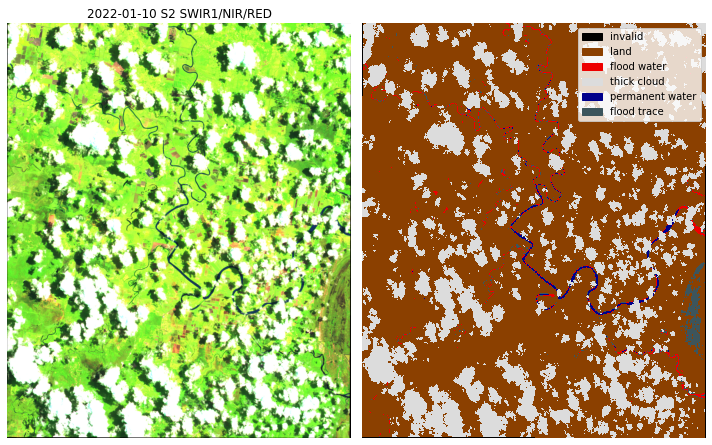

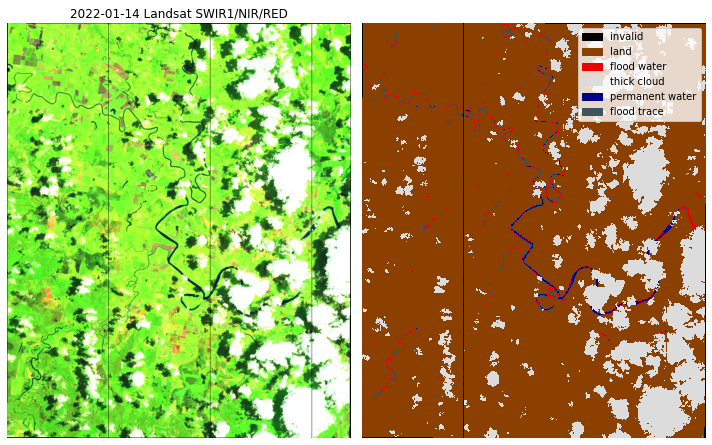

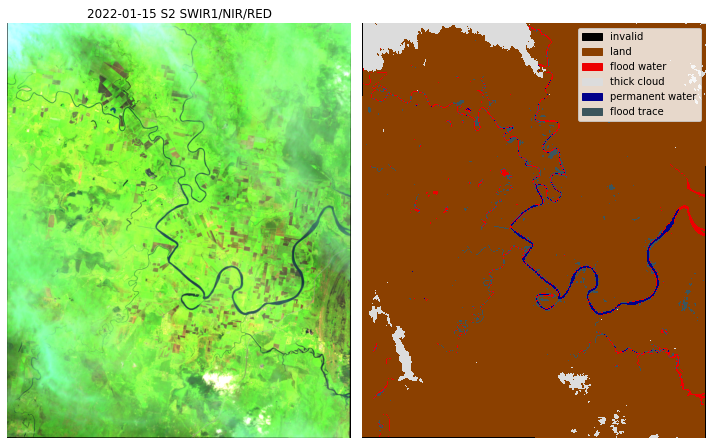

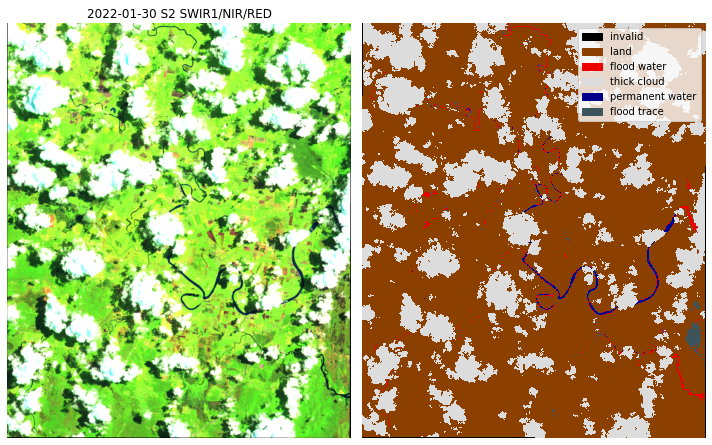

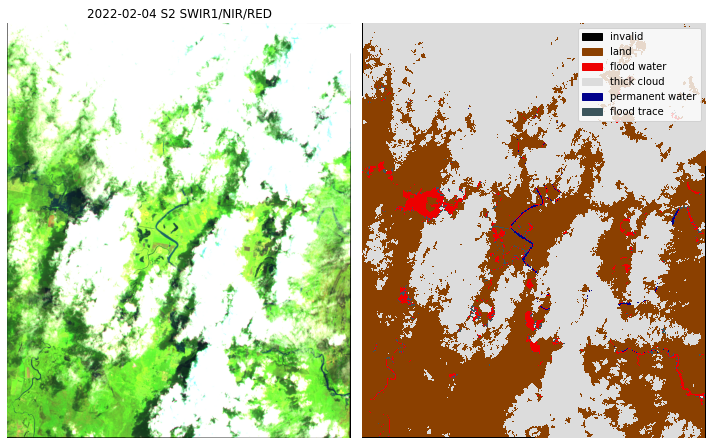

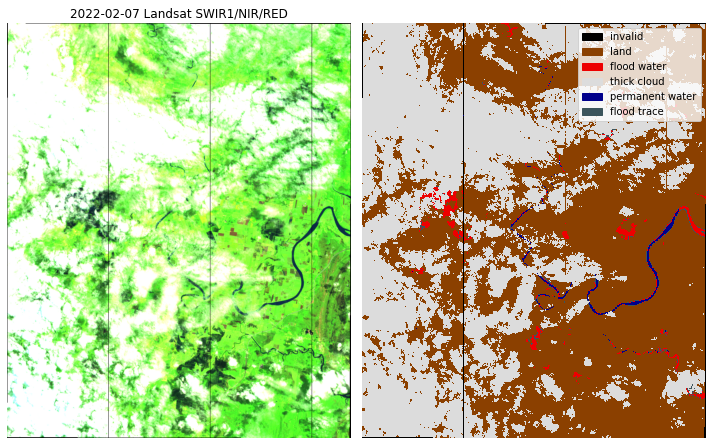

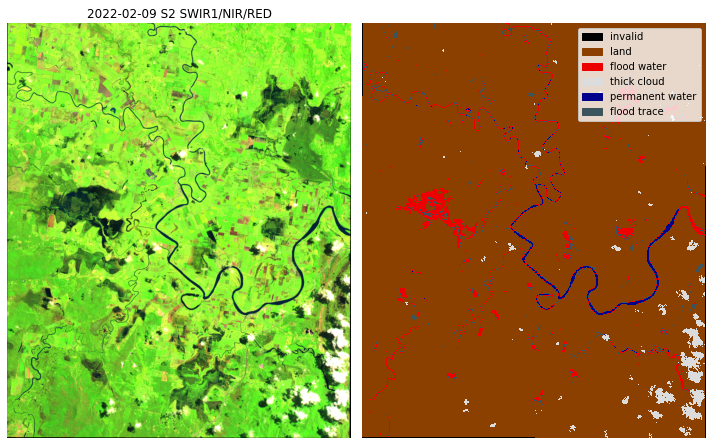

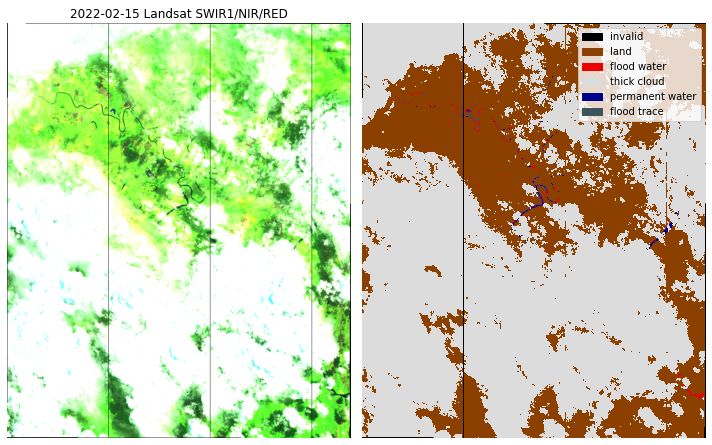

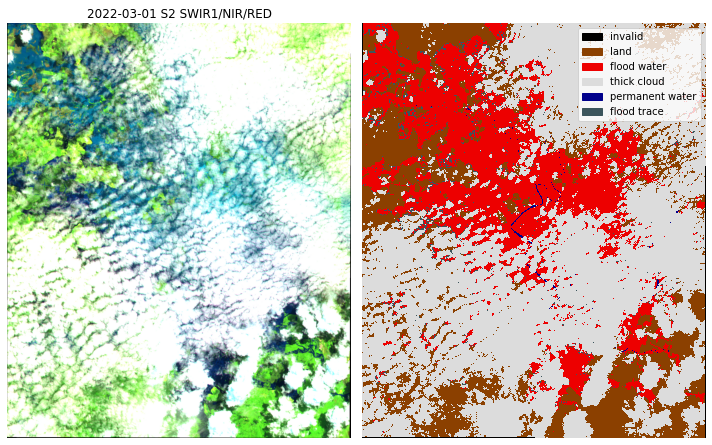

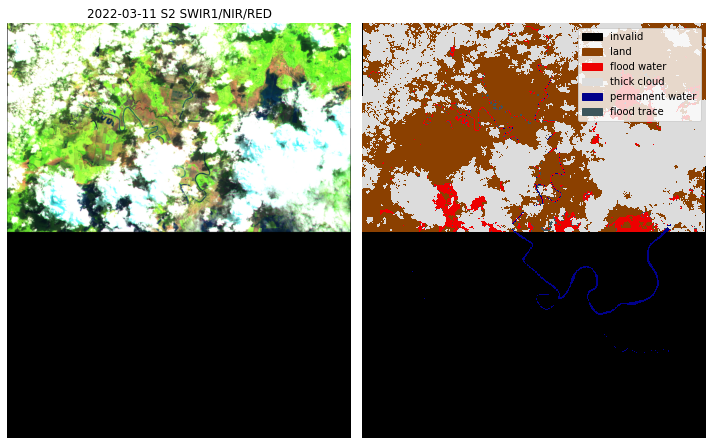

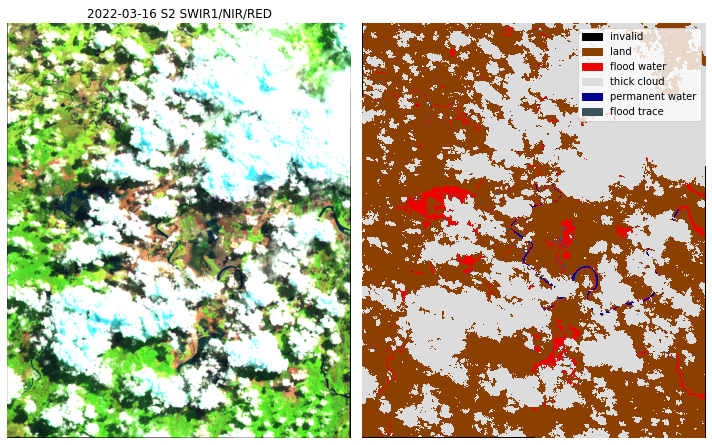

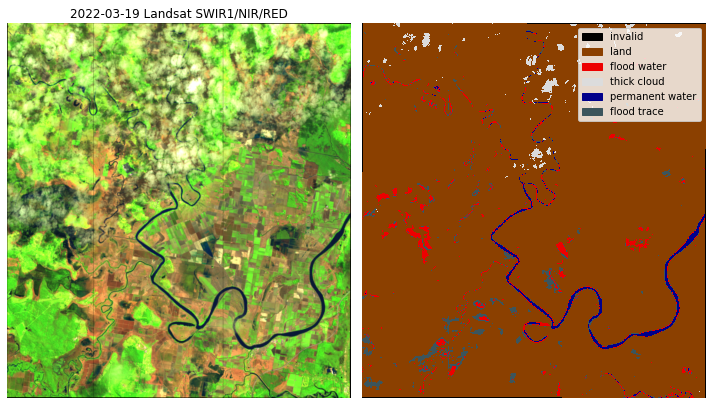

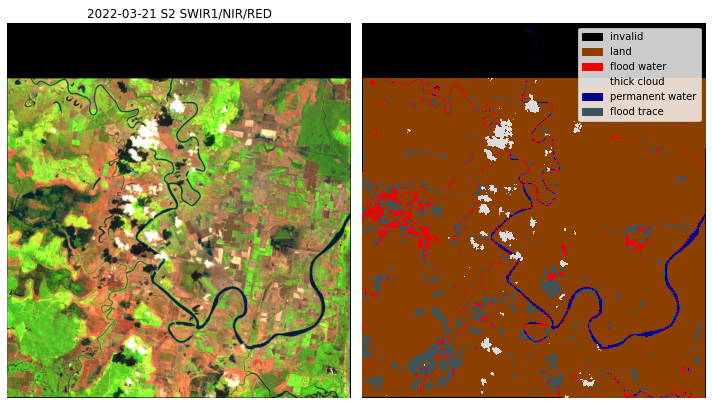

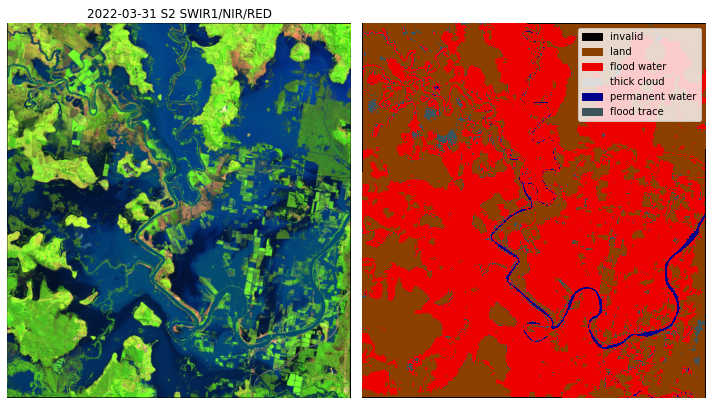

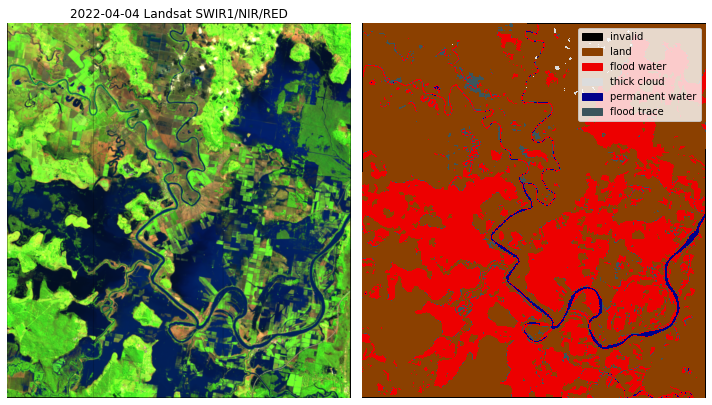

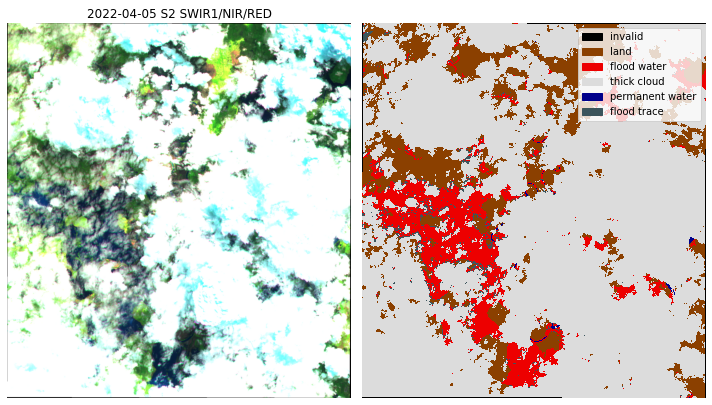

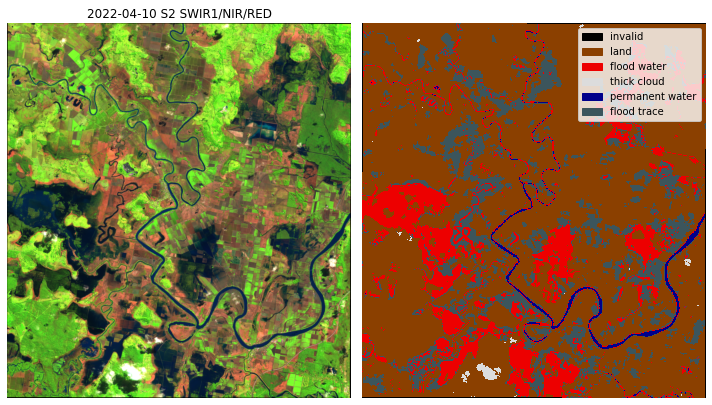

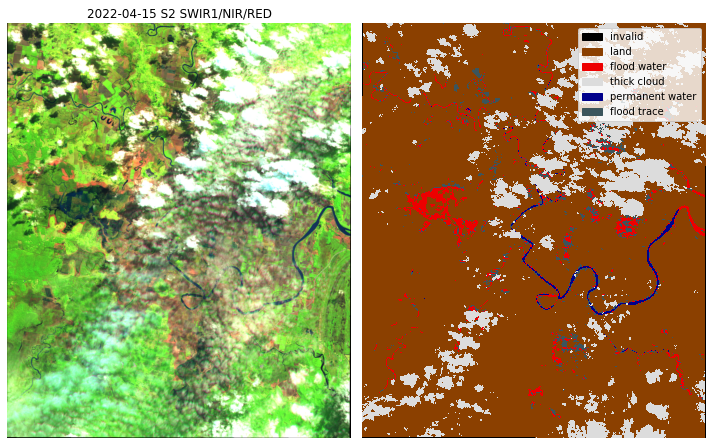

In [8]:
from ml4floods.data import utils
from ml4floods.models.model_setup import get_channel_configuration_bands
from ml4floods.models.postprocess import get_mask_watertypes
from ml4floods.visualization import plot_utils
import rasterio.plot as rasterioplt
import rasterio.warp
import numpy as np
from ml4floods.data.save_cog import save_cog

MNDWI_L8_BANDS = ["B6", "B3"]
MNDWI_S2_BANDS = ["B11", "B3"]
channel_configuration = "bgriswir"
experiment_name = "WF2_unet_rbgiswirs"

with utils.rasterio_open_read(permanent_water) as rst:
    permanent_water_data = rst.read(1)
    transform_permanent = rst.transform
    crs_permanent = rst.crs    

for floodmap in floodmaps:
    date_floodmap = floodmap[-14:-4]
    path_image = floodmap.replace(f"/{experiment_name}/","/S2/")
    collection_name ="S2"
    if not os.path.exists(path_image):
        # print(f"{path_image} not found, trying with Landsat")
        path_image = path_image.replace(f"/S2/","/Landsat/")
        collection_name ="Landsat"
        assert os.path.exists(path_image), f"Not found {path_image} for flood pred {floodmap}"
    
    ibands = [i+1 for i in get_channel_configuration_bands(channel_configuration,
                                                           collection_name=collection_name)]
    
    with utils.rasterio_open_read(path_image) as rst:
        image_data = np.nan_to_num(rst.read(ibands)).astype(np.float32)
        transform = rst.transform
        crs = rst.crs
        if rst.shape != permanent_water_data.shape:
            permanent_water_iter = np.ndarray(rst.shape, dtype=permanent_water_data.dtype)
            permanent_water_iter, _ = rasterio.warp.reproject(
                permanent_water_data,
                destination=permanent_water_iter,
                src_transform=transform_permanent,
                src_crs=crs_permanent,
                dst_transform=transform,
                dst_crs=rst.crs,
                src_nodata=0,
                dst_nodata=0,
                resampling=rasterio.warp.Resampling.nearest)
        else:
            permanent_water_iter = permanent_water_data
        
        
    with utils.rasterio_open_read(floodmap) as rst:
        water_data = rst.read(1)
    
    # (GREEN - SWIR1) / (GREEN + SWIR1)
    mndwi = (image_data[1] - image_data[-1]) / (image_data[1] + image_data[-1]+1e-6)
    
    water_types = get_mask_watertypes(mndwi=mndwi, water_mask=water_data, permanent_water=permanent_water_iter)
    
    path_tiff_save = floodmap.replace(f"/{experiment_name}/",f"/{experiment_name}_types/")
    dirname = os.makedirs(os.path.dirname(path_tiff_save),exist_ok=True)
    
    if not os.path.exists(path_tiff_save):
        save_cog(water_types[None], path_tiff_save, {"transform": transform, "crs": crs, "RESAMPLING":"NEAREST"}, 
             descriptions=["invalid/land/flood water/thick cloud/permanent water/flood trace"])
    
    fig, ax = plt.subplots(1,2, figsize=(10,7), tight_layout=True)
    plot_utils.plot_swirnirred_image(image_data, transform=transform,  
                                     channel_configuration=channel_configuration, 
                                     collection_name=collection_name,ax=ax[0])
#     plot_utils.plot_rgb_image(image_data, transform=transform,  
#                               channel_configuration=channel_configuration,
#                               collection_name=collection_name,ax=ax[0])
#     ax[1].imshow(mndwi,vmin=-1,vmax=1)
#     ax[1].imshow(permanent_water_data,vmin=0,vmax=3)
#     plot_utils.plot_gt_v1(water_data[None], transform=transform,ax=ax[2])
    
    
    cmap_gt, norm_gt, patches_gt = plot_utils.get_cmap_norm_colors(plot_utils.COLORS_WORLDFLOODS_PERMANENT, 
                                                                   ["invalid", "land", "flood water", "thick cloud", 
                                                                    "permanent water", "flood trace"])
    rasterioplt.show(water_types, transform=transform, cmap=cmap_gt, norm=norm_gt,
                     interpolation='nearest', ax=ax[1])
    ax[1].legend(handles=patches_gt,
              loc='upper right')
    ax[0].set_title(f"{date_floodmap} {collection_name} SWIR1/NIR/RED")
    plt.tight_layout()
    for axs in ax:
        axs.axis("off")
        
    